In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import keras.utils
from keras import utils as np_utils

In [3]:
import tensorflow.keras.layers
import tensorflow as tf



In [4]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import concatenate
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2
import numpy as np


In [5]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/Dataset/DR',
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/Dataset/DR', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(224, 224, 3))

Found 2208 images belonging to 5 classes.
Found 552 images belonging to 5 classes.


In [6]:
from keras.applications import densenet

DENSENET_201 = Sequential()

densenet201_model = keras.applications.densenet.DenseNet201(
    include_top=False, weights='imagenet',
    input_shape=(224,224,3), pooling=('max'), classes=5
)

74836368/74836368 [==============================] - 5s 0us/step


In [7]:
import keras
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
import tensorflow.keras.applications


# Load DenseNet-169 model without top layers
densenet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a Sequential model
DENSENET_201 = keras.models.Sequential()

# Set layers in densenet169_model to non-trainable
for layer in densenet201_model.layers:
    layer.trainable = False

# Add layers to the model
DENSENET_201.add(densenet201_model)
DENSENET_201.add(Flatten())
DENSENET_201.add(Dense(512, activation='relu'))
DENSENET_201.add(Dense(5, activation='softmax'))

# Compile the model
sgd = SGD(learning_rate=0.0001)
DENSENET_201.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your ImageDataGenerators set up
# train_generator = ...
# validation_generator = ...

# Train the model
graph = DENSENET_201.fit(train_generator, epochs=25, validation_data=validation_generator)


# Print the results
print(graph.history)


Epoch 1/25
69/69 [==============================] - 1663s 24s/step - loss: 1.1189 - accuracy: 0.5992 - val_loss: 0.9193 - val_accuracy: 0.6920
Epoch 2/25
69/69 [==============================] - 16s 226ms/step - loss: 0.8770 - accuracy: 0.6780 - val_loss: 0.8604 - val_accuracy: 0.6993
Epoch 3/25
69/69 [==============================] - 16s 224ms/step - loss: 0.8062 - accuracy: 0.7006 - val_loss: 0.8253 - val_accuracy: 0.7065
Epoch 4/25
69/69 [==============================] - 18s 258ms/step - loss: 0.7578 - accuracy: 0.7151 - val_loss: 0.7944 - val_accuracy: 0.7120
Epoch 5/25
69/69 [==============================] - 16s 224ms/step - loss: 0.7273 - accuracy: 0.7269 - val_loss: 0.7914 - val_accuracy: 0.7047
Epoch 6/25
69/69 [==============================] - 16s 229ms/step - loss: 0.7042 - accuracy: 0.7382 - val_loss: 0.7769 - val_accuracy: 0.7156
Epoch 7/25
69/69 [==============================] - 16s 227ms/step - loss: 0.6712 - accuracy: 0.7532 - val_loss: 0.7700 - val_accuracy: 0.7192

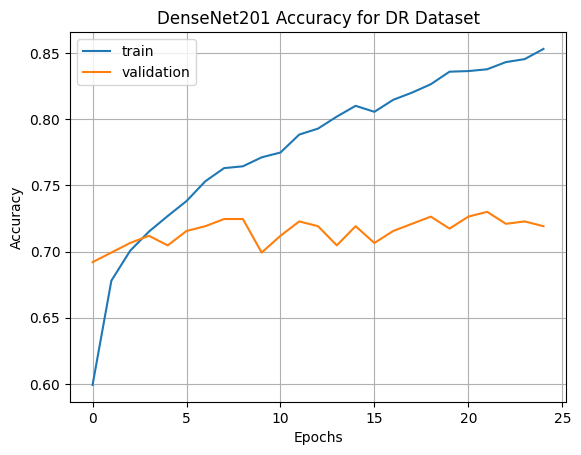

In [8]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Accuracy for DR Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

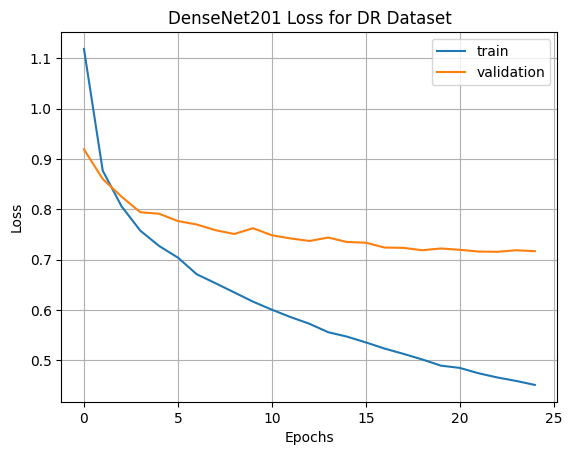

In [9]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Loss for DR Dataset')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()